In [149]:
import tslearn
import numpy as np
import pandas as pd

In [150]:
df_input = pd.read_csv('dataset.csv',header=None)
np_input = df_input.values
print(np_input[0][:].shape)

(409,)


In [151]:
from tslearn.utils import to_time_series_dataset
number_of_stations= np_input.shape[0]
number_of_timesteps =  (int)((np_input.shape[1]-1 )/2)
number_of_features = 2 # min max
X_train = np.zeros(( number_of_stations, number_of_timesteps,  number_of_features  ))
for i in range(number_of_stations):     #np_input.shape[0]):
    
    time_steps = (int)((np_input.shape[1]-1 )/2)
#     print(time_steps)
    ts = np.zeros(( time_steps , 2 ))
    for j in range(1,np_input.shape[1],2):
        [mi,ma] = [ np_input[i][j],np_input[i][j+1] ]
        ts[(int)((j-1)/2)] = [mi,ma]
#     print(ts.shape)
    X_train[i] = ts
    
print(X_train.shape)


(32, 204, 2)


In [174]:
subset = [i for i in range(32) if i not in [18,26]]
print(subset)
print(X_train[subset].shape)
X_train_subset = X_train[subset]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31]
(30, 204, 2)


In [175]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=4, metric="dtw",max_iter = 900,tol = 1e-08,random_state= 12)
km.fit(X_train_subset)


TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=900,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=4, n_init=1, n_jobs=None, random_state=12,
                 tol=1e-08, verbose=0)

In [176]:
predictions = km.predict(X_train_subset)
c_assign = np.zeros(30)
for k in range(4):
    c_0 = np.argwhere(predictions==k)
    c_assign[c_0] = k
#     print(k,c_0)
print(c_assign)
    

[0. 0. 0. 3. 0. 0. 3. 3. 3. 0. 3. 0. 0. 3. 3. 3. 0. 3. 0. 3. 3. 2. 0. 0.
 3. 3. 3. 1. 0. 0.]


In [177]:
# Assign cluster assignments
print(X_train_subset.shape)


(30, 204, 2)


In [155]:
five_station_max =  X_train[0].T[0]
# two_station_min_max = X_train[18,29]
print(five_station_max.shape)
print(five_station_max[:5])

(204,)
[102.  55.  56.  72. 107.]


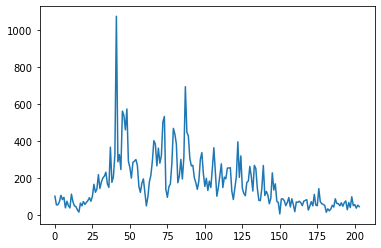

In [156]:

# one_station_min_max.reshape((1,204,2))

# np.reshape(one_station_min_max,(1,204,2) )

one_station_max = one_station_min_max.T[0]
x = [ i for i in range(204)]
# print(x.s)
y = five_station_max
from matplotlib import pyplot as plt
plt.plot(x,y)

[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 171.0424836601307
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 211.89215686274514
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 184.2303921568627
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 174.73856209150327
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 221.11437908496728
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 168.10947712418303
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 165.91013071895426
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 240.57516339869278
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 165.45359477124182
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 228.13398692810455
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 151.03104575163397
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 220.5392156862745
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 167.75196078431378
[ 0  1  2  4  5  9 11 12 16 18 22 23 28 29] 157.4892973856209
cluster  0 --> 187.71513188608776
[27] 193.933545751634
cluster  1 --> 193.933545751634
[21] 155.16830065359477
cluster  2

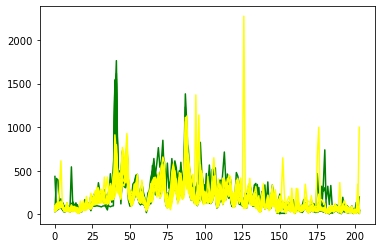

In [183]:
x = [ i for i in range(204)]

colors = ['green','red','blue','yellow','purple','cyan']
K = 4
for k in range(K):
    cluster_avg = 0
    size =0
    c_k_stations = np.argwhere(c_assign == k).flatten()
    for station in c_k_stations:
        
        temporal_trend_max  = X_train_subset[station].T[0]
        y = temporal_trend_max
        cluster_avg += np.sum(y)
        print(c_k_stations,np.sum(y)/204)
        size +=1
        if(k in [0,3]):
            plt.plot(x,y,color = colors[k])
    print("cluster ",k,"-->",cluster_avg/(size*204))
    
plt.show()

    

In [101]:
# #-------------------------FOR CARTO PLOT--------------------------------------------------------
# data_dir = '../../Data/'
# import pandas as pd
# df=pd.read_csv(data_dir+'location_name_lat_lon.csv', sep=',')
# df

,location,latitude,longitude
0,"Sonia Vihar, Delhi - DPCC",28.710508,77.249485
1,"Vivek Vihar, Delhi - DPCC",28.672342,77.315260
2,"Okhla Phase-2, Delhi - DPCC",28.530785,77.271255
3,"NSIT Dwarka, Delhi - CPCB",28.609090,77.032541
4,"Jawaharlal Nehru Stadium, Delhi - DPCC",28.580280,77.233829
5,"Ashok Vihar, Delhi - DPCC",28.695381,77.181665
6,"Anand Vihar, Delhi - DPCC",28.646835,77.316032
7,"Mundka, Delhi - DPCC",28.684678,77.076574
8,"Narela, Delhi - DPCC",28.822836,77.101981
9,"Sri Aurobindo Marg, Delhi - DPCC",28.531346,77.190156


In [82]:
# df_input = pd.read_csv('dataset.csv',header=None)
# np_input = df_input.values
# print(np_input.shape)
# print(np_input[:,0])

(32, 409)
['Sonia Vihar, Delhi - DPCC' 'Vivek Vihar, Delhi - DPCC'
 'Okhla Phase-2, Delhi - DPCC' 'NSIT Dwarka, Delhi - CPCB'
 'Jawaharlal Nehru Stadium, Delhi - DPCC' 'Ashok Vihar, Delhi - DPCC'
 'Mundka, Delhi - DPCC' 'Narela, Delhi - DPCC'
 'Sri Aurobindo Marg, Delhi - DPCC' 'Patparganj, Delhi - DPCC'
 'Alipur, Delhi - DPCC' 'Mandir Marg, Delhi - DPCC'
 'Nehru Nagar, Delhi - DPCC'
 'Dr. Karni Singh Shooting Range, Delhi - DPCC' 'Bawana, Delhi - DPCC'
 'CRRI Mathura Road, Delhi - IMD' 'IHBAS, Dilshad Garden, Delhi - CPCB'
 'Major Dhyan Chand National Stadium, Delhi - DPCC' 'Rohini, Delhi - DPCC'
 'Jahangirpuri, Delhi - DPCC' 'Shadipur, Delhi - CPCB'
 'Lodhi Road, Delhi - IMD' 'US Diplomatic Post: New Delhi'
 'R K Puram, Delhi - DPCC' 'Wazirpur, Delhi - DPCC'
 'Punjabi Bagh, Delhi - DPCC' 'DTU, Delhi - CPCB'
 'Dwarka-Sector 8, Delhi - DPCC ' 'Najafgarh, Delhi - DPCC'
 'ITO, Delhi - CPCB' 'Aya Nagar, Delhi - IMD'
 'IGI Airport (T3), Delhi - IMD']


In [104]:
# clusters = []
# lat = []
# long = []
# location = []
# for i in range(np_input.shape[0]):
#     loc = np_input[i,0]
#     for j in range(df.shape[0]):
#         if(df['location'][j]==loc):
#             location.append(loc)
#             lat.append( df['latitude'][j])
#             long.append(df['longitude'][j])
#             print(loc,df['latitude'][j])
#     clusters.append(c_assign[i])
    
# #     df['Cluster'][loc] = c_assign[i]
# print(len(clusters))
# # print(long)
    

Sonia Vihar, Delhi - DPCC 28.710508
Vivek Vihar, Delhi - DPCC 28.672341999999997
Okhla Phase-2, Delhi - DPCC 28.530784999999998
NSIT Dwarka, Delhi - CPCB 28.609090000000002
Jawaharlal Nehru Stadium, Delhi - DPCC 28.58028
Ashok Vihar, Delhi - DPCC 28.695381
Mundka, Delhi - DPCC 28.684678
Narela, Delhi - DPCC 28.822836
Sri Aurobindo Marg, Delhi - DPCC 28.531346000000003
Patparganj, Delhi - DPCC 28.623748
Alipur, Delhi - DPCC 28.815329
Mandir Marg, Delhi - DPCC 28.636428999999996
Nehru Nagar, Delhi - DPCC 28.567890000000002
Dr. Karni Singh Shooting Range, Delhi - DPCC 28.498571000000002
Bawana, Delhi - DPCC 28.7762
CRRI Mathura Road, Delhi - IMD 28.5512005
IHBAS, Dilshad Garden, Delhi - CPCB 28.681173600000005
Major Dhyan Chand National Stadium, Delhi - DPCC 28.611280999999998
Rohini, Delhi - DPCC 28.732528000000002
Jahangirpuri, Delhi - DPCC 28.73282
Shadipur, Delhi - CPCB 28.651478100000002
Lodhi Road, Delhi - IMD 28.5918245
US Diplomatic Post: New Delhi 28.635759999999998
R K Puram, De

In [91]:
# df_input['Cluster'] = clusters

In [93]:
# df_input.shape

(32, 410)

In [107]:
# new_df = pd.DataFrame() 

In [110]:
# new_df["location"] = location
# new_df["latitude"] = lat
# new_df["longitude"] = long
# new_df["cluster"] = clusters

In [111]:
# print(new_df)

                                            location   latitude  longitude  \
0                          Sonia Vihar, Delhi - DPCC  28.710508  77.249485   
1                          Vivek Vihar, Delhi - DPCC  28.672342  77.315260   
2                        Okhla Phase-2, Delhi - DPCC  28.530785  77.271255   
3                          NSIT Dwarka, Delhi - CPCB  28.609090  77.032541   
4             Jawaharlal Nehru Stadium, Delhi - DPCC  28.580280  77.233829   
5                          Ashok Vihar, Delhi - DPCC  28.695381  77.181665   
6                               Mundka, Delhi - DPCC  28.684678  77.076574   
7                               Narela, Delhi - DPCC  28.822836  77.101981   
8                   Sri Aurobindo Marg, Delhi - DPCC  28.531346  77.190156   
9                           Patparganj, Delhi - DPCC  28.623748  77.287205   
10                              Alipur, Delhi - DPCC  28.815329  77.153010   
11                         Mandir Marg, Delhi - DPCC  28.636429 

In [112]:
# new_df.to_csv("locations_with_cluster_assignments_6Ckusters.csv")